<a href="https://colab.research.google.com/github/SanTransisco/Fruit_Classification_Workshop/blob/master/CompletedNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing all the libraries we need
## The OS Library
Use the os library to call github to grab our dataset and create some path variables

In [0]:
import os
os.system("git clone https://github.com/SanTransisco/Subset_fruit_repo")

32768

You have now cloned the dataset that we will be using for today's workshop. Go ahead and click on the file icon to the left to see the contents of what we have downloaded.

Also now lets include some of the tenserflow libraries!

Sequential is the typical neural net model that is best easily visualized, and
the one you should be most familiar with.
https://miro.medium.com/max/874/1*eJ36Jpf-DE9q5nKk67xT0Q.jpeg

In [0]:
from tensorflow.keras.models import Sequential
"""
os is used for the path object
numpy and matplotlib are used for data visualization
"""
import numpy as np
import matplotlib.pyplot as plt



These will be the various layers that will go into the Sequential Neural Network model


In [0]:
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# The "Lets Grab our Data" step
## Getting the right python path variables

Our images are stored in a folder called "Subset_fruit_repo". But within that folder we have two datasets, the **training dataset** and the **testing dataset**

Now to get started we should establish some variables so we can give the data to the Neural network


In [0]:
PATH = os.path.realpath("Subset_fruit_repo")
print("This is the relative path for the dataset. Validate that this is correct")
print(PATH)


This is the relative path for the dataset. Validate that this is correct
/content/Subset_fruit_repo


In [0]:
train_dir = os.path.join(PATH, 'Train-Small')
print(train_dir)
validation_dir = os.path.join(PATH, 'Test-Small')
print(validation_dir)

/content/Subset_fruit_repo/Train-Small
/content/Subset_fruit_repo/Test-Small


In [0]:
batch_size = 45
epochs = 10
IMG_HEIGHT = 100
IMG_WIDTH = 100
NUM_TRAIN_EPOCHS = 20
NUM_VAL_EPOCHS = 10

"""
Use this ImageDataGenerator object to scale/normalize the data from 0-255 to 0-1
"""
train_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

In [0]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')

validation_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=validation_dir,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='categorical')
x = next(validation_data_gen)
x[0].shape

Found 4398 images belonging to 8 classes.
Found 1466 images belonging to 8 classes.


(45, 100, 100, 3)

# The part you've all been waiting for: Constructing our Neural Net


In [0]:
model = Sequential([
    Conv2D(10,2, padding = 'same' , activation = 'relu',  input_shape = (IMG_HEIGHT, IMG_WIDTH, 3)),
    #So what are you trying to do with a max pooling layer?
    #MaxPool2D(),
    #Dropout(0.2),
    Conv2D(32,3, padding = 'same' , activation = 'relu'),
    #Conv2D(64,3, padding = 'same' , activation = 'relu'),
    #MaxPool2D(),
    #Dropout(0.2),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(8,activation = 'softmax')
])

Time to compile and start using our Convolutional Neural Net

The compiler we are using for this model is adam, just cause :)

The loss function we are using is called `categorical_crossentropy`

This loss function is used because the output of our neural net is essentially a vector containing probabilities

In [0]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 100, 100, 10)      130       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 100, 100, 32)      2912      
_________________________________________________________________
flatten_4 (Flatten)          (None, 320000)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 512)               163840512 
_________________________________________________________________
dense_9 (Dense)              (None, 8)                 4104      
Total params: 163,847,658
Trainable params: 163,847,658
Non-trainable params: 0
_________________________________________________________________


Now time to sit back and watch the model train itself!

In [0]:
history = model.fit(
    train_data_gen,
    steps_per_epoch = NUM_TRAIN_EPOCHS,
    epochs = epochs,
    validation_data = validation_data_gen,
    validation_steps = NUM_VAL_EPOCHS
)

Epoch 1/10
20/20 [==============================] - 49s 2s/step - loss: 2.1929e-04 - acc: 1.0000 - val_loss: 0.0615 - val_acc: 0.9756
Epoch 2/10
20/20 [==============================] - 49s 2s/step - loss: 2.0007e-04 - acc: 1.0000 - val_loss: 0.0890 - val_acc: 0.9533
Epoch 3/10
20/20 [==============================] - 49s 2s/step - loss: 0.0050 - acc: 0.9989 - val_loss: 0.4884 - val_acc: 0.9156
Epoch 4/10
20/20 [==============================] - 49s 2s/step - loss: 0.0065 - acc: 0.9978 - val_loss: 0.1024 - val_acc: 0.9600
Epoch 5/10
20/20 [==============================] - 49s 2s/step - loss: 8.7992e-04 - acc: 1.0000 - val_loss: 0.0910 - val_acc: 0.9556
Epoch 6/10
20/20 [==============================] - 49s 2s/step - loss: 3.9035e-04 - acc: 1.0000 - val_loss: 0.0660 - val_acc: 0.9689
Epoch 7/10
20/20 [==============================] - 49s 2s/step - loss: 9.7271e-04 - acc: 1.0000 - val_loss: 0.1314 - val_acc: 0.9489
Epoch 8/10
20/20 [==============================] - 49s 2s/step - loss

Time to analyze the performance of our model!

The things we are looking at are going to be

1.   Our Model's Accuracy (duh)
2.   and our model's loss. 

Remember that categorical_crossentropy loss really spikes in value when our model was confident, but still got the classification wrong.



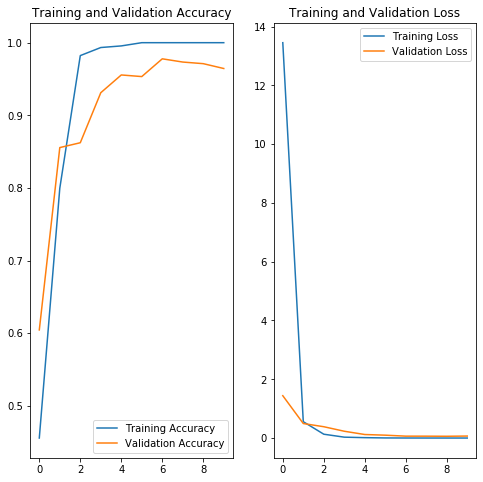

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

# How to use your model in an actual application setting


In [0]:
from PIL import Image
def load(filename):
    #Load the image into this image object
   np_image = Image.open(filename)
   #Take every individual value in each channel and rescale its values to be a value between 0 and 1
   np_image = np.array(np_image).astype('float32')/255
   #the neural net is expecting a 
   np_image = np.expand_dims(np_image, axis=0)
   return np_image

In [0]:
image_path = "/content/Subset_fruit_repo/Train-Small/Lemon/0_100.jpg"
showimg = load_img(image_path)
showimg.show()

In [0]:
img = load(image_path)

print(model.predict_classes(img))
#This is 7 because the model prediced it was the 7th class in our data set aka lemons.
#try to use other fruits to see what it displays

[7]


model.save("fruit_model")